<a href="https://colab.research.google.com/github/iam-arshpreet/cap-comp215/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP215 Mid-term Exam   Spring 2024

#### Score:  _________ / 25

##### Date:  Mar. 11, 2024

#### Student Name: Arshpreet singh


## Instructions:
 - exam is open-book, open-internet, but must be completed individually (no communication, cooperation, or assistance)
 - complete the exercises in this notebook
 - for each exercise, write a piece of code that solves the problem and produces some output, or answer questions in the markdown block, as specified.
 - as always, if you obtain code from an external source (e.g., stack overflow,  ChatGPT, etc.), please acknowledge with a link.

### Topics:
 - Data structures:  list, dictionary, class, graph, 1D array
 - Algorithms: graph traversal, matrix operators (numpy), sliding dot-product (correlation)
 - Techniques: list comprehension, generators, random numbers, plotting
 - Concepts: Counting, Big-O analysis of algorithm time complexity

As usual, we start with module imports...

In [17]:
import itertools
from dataclasses import dataclass
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
from collections import defaultdict

## Structured Data
The `exoplanets` data below was fetched from [NASA's Exoplanet Archive API](https://exoplanetarchive.ipac.caltech.edu/docs/API_queries.html) (only portion of data is shown here).
[https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,disc_year,disc_telescope+from+pscomppars&format=json]

It is a list of confirmed exoplanets, where each record provides the planet name `pl_name` and host star `hostname`, along with discovery year and telescope.

In [18]:
exoplanets = [
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1901',
  'pl_name': 'Kepler-1901 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1882',
  'pl_name': 'Kepler-1882 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1732',
  'pl_name': 'Kepler-1732 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-152',
  'pl_name': 'Kepler-152 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1526',
  'pl_name': 'Kepler-1526 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1475',
  'pl_name': 'Kepler-1475 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1863',
  'pl_name': 'Kepler-1863 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-954',
  'pl_name': 'Kepler-954 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-533',
  'pl_name': 'Kepler-533 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1559',
  'pl_name': 'Kepler-1559 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2019,
  'hostname': 'V1298 Tau',
  'pl_name': 'V1298 Tau d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-34',
  'pl_name': 'K2-34 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-122',
  'pl_name': 'Kepler-122 f'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-413',
  'pl_name': 'Kepler-413 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-154',
  'pl_name': 'K2-154 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-885',
  'pl_name': 'Kepler-885 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-120',
  'pl_name': 'Kepler-120 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1878',
  'pl_name': 'Kepler-1878 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-324',
  'pl_name': 'Kepler-324 e'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'KIC 5437945',
  'pl_name': 'Kepler-460 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-473',
  'pl_name': 'Kepler-473 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-85',
  'pl_name': 'Kepler-85 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-32',
  'pl_name': 'Kepler-32 e'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2012,
  'hostname': 'GJ 3470',
  'pl_name': 'GJ 3470 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2013,
  'hostname': 'Kepler-66',
  'pl_name': 'Kepler-66 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-971',
  'pl_name': 'Kepler-971 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1432',
  'pl_name': 'Kepler-1432 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-953',
  'pl_name': 'Kepler-953 b'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2008,
  'hostname': 'HD 20868',
  'pl_name': 'HD 20868 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1365',
  'pl_name': 'Kepler-1365 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-903',
  'pl_name': 'Kepler-903 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-347',
  'pl_name': 'K2-347 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2015,
  'hostname': 'Kepler-439',
  'pl_name': 'Kepler-439 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-810',
  'pl_name': 'Kepler-810 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-334',
  'pl_name': 'K2-334 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2022,
  'hostname': 'TOI-2184',
  'pl_name': 'TOI-2184 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-600',
  'pl_name': 'Kepler-600 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1161',
  'pl_name': 'Kepler-1161 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-543',
  'pl_name': 'Kepler-543 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1494',
  'pl_name': 'Kepler-1494 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1221',
  'pl_name': 'Kepler-1221 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-856',
  'pl_name': 'Kepler-856 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1340',
  'pl_name': 'Kepler-1340 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-266',
  'pl_name': 'K2-266 e'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1473',
  'pl_name': 'Kepler-1473 b'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2009,
  'hostname': 'HD 125595',
  'pl_name': 'HD 125595 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-173',
  'pl_name': 'Kepler-173 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2022,
  'hostname': 'TOI-1759',
  'pl_name': 'TOI-1759 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1853',
  'pl_name': 'Kepler-1853 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1083',
  'pl_name': 'Kepler-1083 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2022,
  'hostname': 'K2-384',
  'pl_name': 'K2-384 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-46',
  'pl_name': 'K2-46 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2019,
  'hostname': 'TOI-125',
  'pl_name': 'TOI-125 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-262',
  'pl_name': 'Kepler-262 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1493',
  'pl_name': 'Kepler-1493 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2022,
  'hostname': 'K2-383',
  'pl_name': 'K2-383 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1156',
  'pl_name': 'Kepler-1156 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1593',
  'pl_name': 'Kepler-1593 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-769',
  'pl_name': 'Kepler-769 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-180',
  'pl_name': 'K2-180 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1001',
  'pl_name': 'Kepler-1001 b'},
 {'disc_telescope': '1.6 m wide-field telescope',
  'disc_year': 2019,
  'hostname': 'KMT-2017-BLG-1146L',
  'pl_name': 'KMT-2017-BLG-1146L b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-59',
  'pl_name': 'Kepler-59 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1339',
  'pl_name': 'Kepler-1339 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-116',
  'pl_name': 'Kepler-116 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1735',
  'pl_name': 'Kepler-1735 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1919',
  'pl_name': 'Kepler-1919 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2018,
  'hostname': 'K2-199',
  'pl_name': 'K2-199 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-30',
  'pl_name': 'Kepler-30 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1058',
  'pl_name': 'Kepler-1058 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-342',
  'pl_name': 'Kepler-342 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-178',
  'pl_name': 'Kepler-178 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-300',
  'pl_name': 'Kepler-300 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2012,
  'hostname': 'Kepler-49',
  'pl_name': 'Kepler-49 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-285',
  'pl_name': 'Kepler-285 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1388',
  'pl_name': 'Kepler-1388 e'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2010,
  'hostname': 'HD 113538',
  'pl_name': 'HD 113538 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-921',
  'pl_name': 'Kepler-921 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-84',
  'pl_name': 'Kepler-84 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-151',
  'pl_name': 'Kepler-151 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-484',
  'pl_name': 'Kepler-484 b'},
 {'disc_telescope': '0.1 m TESS Telescope',
  'disc_year': 2022,
  'hostname': 'TOI-4329',
  'pl_name': 'TOI-4329 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1224',
  'pl_name': 'Kepler-1224 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1630',
  'pl_name': 'Kepler-1630 b'},
 {'disc_telescope': '3.6 m ESO Telescope',
  'disc_year': 2021,
  'hostname': 'HD 93385',
  'pl_name': 'HD 93385 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2015,
  'hostname': 'KIC 5951458',
  'pl_name': 'KIC 5951458 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-688',
  'pl_name': 'Kepler-688 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1379',
  'pl_name': 'Kepler-1379 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2013,
  'hostname': 'KOI-351',
  'pl_name': 'KOI-351 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1543',
  'pl_name': 'Kepler-1543 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1837',
  'pl_name': 'Kepler-1837 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-326',
  'pl_name': 'Kepler-326 d'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'K2-26',
  'pl_name': 'K2-26 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1128',
  'pl_name': 'Kepler-1128 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-334',
  'pl_name': 'Kepler-334 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1448',
  'pl_name': 'Kepler-1448 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2016,
  'hostname': 'Kepler-1350',
  'pl_name': 'Kepler-1350 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-1770',
  'pl_name': 'Kepler-1770 b'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2014,
  'hostname': 'Kepler-401',
  'pl_name': 'Kepler-401 c'},
 {'disc_telescope': '0.95 m Kepler Telescope',
  'disc_year': 2021,
  'hostname': 'Kepler-511',
  'pl_name': 'Kepler-511 c'}
]

### Q.1  (2 points)
Use a **list comprehension** to define a list of exoplanet names (`pl_name`) that were discovered (`disc_year`) in `2018`
*Hint*: there are 5 such planets in the `exoplanets` list above.

In [47]:
# Solution for Q.1 here

pl_name = [i['pl_name'] for i in exoplanets if i['disc_year'] == 2018 ]


['K2-154 c', 'K2-334 b', 'K2-266 e', 'K2-180 b', 'K2-199 b']

### Q.2  (3 points)
Develop a `dict` with a count of the number of exoplanets discovered in each year.
There are *many* different ways to approach this - for full points solution should be concise and easy to understand.

*Tip*: the built-in [defaultdict(int)](https://docs.python.org/3/library/collections.html#collections.defaultdict) could help here.

In [72]:
# Solution for Q.2 here
def pl_no_finder(disc_year):
  pl_name = [i['pl_name'] for i in exoplanets if i['disc_year'] == disc_year]
  return pl_name

disc_years = {i['disc_year'] for i in exoplanets}
number_of_planets_each_year = [(i,len(pl_no_finder(i))) for i in disc_years]

pl_no_dict= {}
for i, j in number_of_planets_each_year:
  pl_no_dict[i]=j
pl_no_dict

{2016: 45,
 2018: 5,
 2019: 3,
 2021: 13,
 2022: 5,
 2008: 1,
 2009: 1,
 2010: 1,
 2012: 6,
 2013: 2,
 2014: 16,
 2015: 2}

### Q.3  (2 points)
Plot your discoveries-by-year dictionary as a [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) chart.
(no need to label axes or add a chart title)
*Tip*:  remember your dictionary has iterables `.keys()` and `.values()`

<BarContainer object of 12 artists>

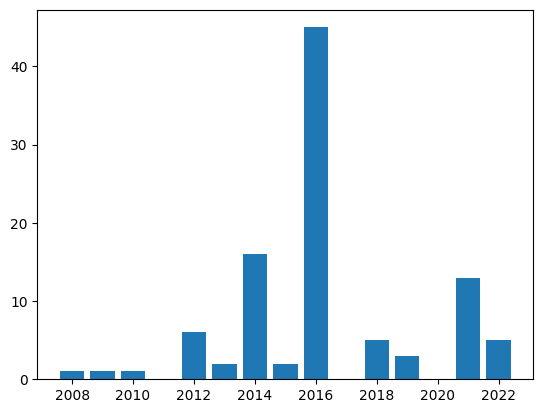

In [73]:
# Solution for Q.3 here
plt.bar(pl_no_dict.keys(),pl_no_dict.values())



## Classes
Develop a small class to represent a single exoplanet object.
You may use `@dataclass` or a regular class, as you wish.

Your class should define at least 2 methods:
```
  def __str__(self) :
      """ return a nicely formatted string with the exoplanet's name and its discovery year """

  def has_same_host(self, other) :
      """ return True iff this exoplanet and the other share the same host star (`hostname`) """
```

### Q.4   (5 points)
Write your class below and include some code to test it and both its methods.

In [74]:
# Solution for Q. 4 here
class exoplanet:
  def __init__(self, disc_telescope, disc_year, hostname, pl_name):
    self.disc_telescope = disc_telescope
    self.disc_year = disc_year
    self.hostname = hostname
    self.pl_name = pl_name

  def __str__(self):
      """ return a nicely formatted string with the exoplanet's name and its discovery year """

      return f'{self.pl_name} was discovered in {self.disc_year}'

  def has_same_host(self, other) :
      """ return True iff this exoplanet and the other share the same host star (`hostname`) """
      return self.hostname == other.hostname


## 1D Cellular Automata
Wolfram's experiments with Elementary 1D CA's explored the "universe" in which the fate of a cell depended on its direct 3-cell neighbourhood.   We could easily extend this experiment to examine the universe of 1D CA's influenced by a 5-cell neighbourhood.  Answer the following questions about 5-cell neighbourhood 1D CA's.

In [23]:
# Example:  here are all the 5-cell neighbourhoods for a sample 1D CA
ca = np.array( [0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0] )
neighbourhoods = [ca[i-2:i+3] for i in range(2, len(ca)-2)]
neighbourhoods

[array([0, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 1]),
 array([1, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 1]),
 array([1, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 0])]

### Q.5  (3 points)
Write a Python expression in the code block below to answer each of these questions:

a. What is number of unique possible states for a 5-cell neighbourhood?
b. How many possible 5-cell CA "rules" are there?
c. Wolfram numbered the Elementary CA's 0 - 255;   how could we similarly number the rules for our 5-cell CA model?

In [ ]:
# Solutions for Q.5 here
# a)
possible_states = 2**5

# b)
possible_rules = 2**(2**5)

# c) we can use the same thinking using binary but the numbers will be too large


### Q.6  (4 points)
The core of the efficient algorithm we developed for Wolfram's Elementary CA's is provided below.

Make the *minimum* modifications to implement a 5-cell CA.
Update the unit tests to reflect this change (*tip*: use the function to get the expected output!)

In [ ]:
# Solution for Q.6 here
POWERS_OF_2 = np.array((16, 8, 4, 2, 1))

def rule_indexes(state):
    """ Return vector of rule indexes - one index for each neighbourhood in the CA state vector. """
    # "pad" ends of state array with one extra 0 cell to mitigate edge effects
    return np.correlate(np.pad(state, 1, mode='constant'), POWERS_OF_2, mode='valid')

assert all( rule_indexes(np.array([1,0,0,0,1,0,0,0])) == [2, 4, 0, 1, 2, 4, 0, 0] )


def transition(state, rule):
    """ Return the vector resulting from a transition of given CA state under the given 8-bit rule """
    indexes = rule_indexes(state)
    return np.array(rule[indexes])

rule_110 = (0,1,1,0,1,1,1,0)[::-1]
ca_state = (0,0,1,0,1,0,0,0,1,1,0)
assert all( transition(np.array(ca_state), np.array(rule_110)) == (0,1,1,1,1,0,0,1,1,1,0))

## Graph Traversal
The following graph represents the houses in a small town, with edges between houses that are "comparable".  

Two houses are **"comparable"** when they have similar amenities, like square footage, light exposure, yard size, etc.  
Each house is labelled with its current assessed value (price) in $100K

Below, you will answer some questions about this graph.
The graph generation algorithm given here is for a random graph. Your algorithms should work for any such graph.

In [26]:
def generate_graph(n, p=0.3):
    """ Return a "complete" undirected Graph with n nodes labeled 0 .. n-1 """
    graph = nx.Graph()
    prices = [random.randrange(400, 999) for _ in range(n)]
    graph.add_nodes_from(prices)
    edges = [pair for pair in itertools.combinations(prices, 2) if random.random() < p]
    graph.add_edges_from(edges)
    return graph

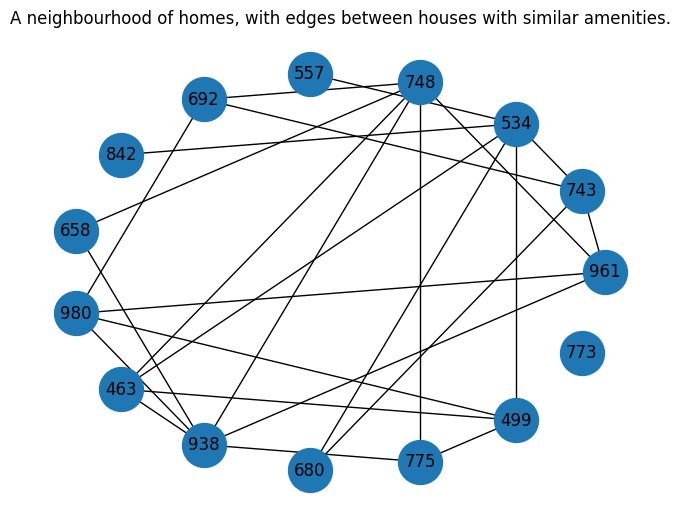

In [27]:
random.seed(35)
G = generate_graph(15)
nx.draw_circular(G, node_size=1000, with_labels=True)
plt.gca().set(title=f'A neighbourhood of homes, with edges between houses with similar amenities.')
plt.show()

### Q.7  (2 points)
The set of "comparables" for a given house are simply its neighbours in the graph: `G.neighbours(house)`.

**Note**: For simplicity, a "house" and its "price" are the same thing, represented by a node in the graph.

Write a function, `price_ratio` that takes a `graph` and a single `house price` (node) as input, and returns the ratio between the house price and the average price of its "comparables".  
If a house has no comparables, the price_ratio should be 1.

In [ ]:
# Solution for Q.7 here
def price_ratio(graph, house_price):
  price = [i[1]for i in graph.edges(house_price)]
  comparables_avg = (sum(price))/len(graph.edges(house_price))
  return house_price/comparables_avg

price_ratio(G,463)


### Q.8  (4 points)

Note that a `price_ratio` > 1 indicates the house is over-priced, while a `price_ratio` < 1 indicates the house is under-priced, with respect to its comparables.
The best deal is the house with the lowest `price_ratio`.

Write a function, `best_deal` that takes a `graph` and returns the node (price) of the house that is the "best deal".
*Tip*: you can obtain all the house prices from the graph:  `G.nodes`

In [113]:
# Solution for Q.8 here
def best_deal(graph):
  allprice = [price_ratio(graph, i) for i in graph.nodes() if graph.neighbours(i)>0]
  all_prices = graph.nodes()
  lowest_deal = min(allprice)
  # return lowest_deal
